<a href="https://colab.research.google.com/github/mohtashimbq/BIQA_Toolbox/blob/master/DNN_DE_ResNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-yodk9jby
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-yodk9jby
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp36-none-any.whl size=20032 sha256=59dc61efc974669419f5337c83ffc5888011765eab90f294a29aacadecb199ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-k_p2p8yy/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.tfkeras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')

pre_trained_model = ResNet18((224,224,3), weights='imagenet')

#for layer in pre_trained_model.layers:
#  layer.trainable = False

pre_trained_model.summary()

46981120/46977688 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
_____________________________

In [0]:
last_layer = pre_trained_model.get_layer('relu1') # Your Code Here
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output # Your Code Here

last layer output shape:  (None, 7, 7, 512)


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(7,activation='softmax')(x)           
model = Model(pre_trained_model.input,x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path_data= '/content/drive/My Drive/SIQAD_Database.zip'

import zipfile

local_zip = path_data
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/')
zip_ref.close()

In [0]:
train_1_dir = "/content/drive/My Drive/SIQAD_Database/Training/1" # Your Code Here
train_2_dir = "/content/drive/My Drive/SIQAD_Database/Training/2" # Your Code Here
train_3_dir = "/content/drive/My Drive/SIQAD_Database/Training/3" # Your Code Here
train_4_dir = "/content/drive/My Drive/SIQAD_Database/Training/4" # Your Code Here
train_5_dir = "/content/drive/My Drive/SIQAD_Database/Training/5" # Your Code Here
train_6_dir = "/content/drive/My Drive/SIQAD_Database/Training/6" # Your Code Here
train_7_dir = "/content/drive/My Drive/SIQAD_Database/Training/7" # Your Code Here
test_1_dir = "/content/drive/My Drive/SIQAD_Database/Testing/1/" # Your Code Here
test_2_dir = "/content/drive/My Drive/SIQAD_Database/Testing/2/" # Your Code Here
test_3_dir = "/content/drive/My Drive/SIQAD_Database/Testing/3/" # Your Code Here
test_4_dir = "/content/drive/My Drive/SIQAD_Database/Testing/4/" # Your Code Here
test_5_dir = "/content/drive/My Drive/SIQAD_Database/Testing/5/" # Your Code Here
test_6_dir = "/content/drive/My Drive/SIQAD_Database/Testing/6/" # Your Code Here
test_7_dir = "/content/drive/My Drive/SIQAD_Database/Testing/7/" # Your Code Here

train_1_fnames = os.listdir(train_1_dir) # Your Code Here
train_2_fnames = os.listdir(train_2_dir) # Your Code Here
train_3_fnames = os.listdir(train_3_dir) # Your Code Here
train_4_fnames = os.listdir(train_4_dir) # Your Code Here
train_5_fnames = os.listdir(train_5_dir) # Your Code Here
train_6_fnames = os.listdir(train_6_dir) # Your Code Here
train_7_fnames = os.listdir(train_7_dir) # Your Code Here

test_1_fnames = os.listdir(test_1_dir) # Your Code Here
test_2_fnames = os.listdir(test_2_dir) # Your Code Here
test_3_fnames = os.listdir(test_3_dir) # Your Code Here
test_4_fnames = os.listdir(test_4_dir) # Your Code Here
test_5_fnames = os.listdir(test_5_dir) # Your Code Here
test_6_fnames = os.listdir(test_6_dir) # Your Code Here
test_7_fnames = os.listdir(test_7_dir) # Your Code Here

print(len(train_1_fnames)) # Your Code Here
print(len(train_2_fnames)) # Your Code Here
print(len(train_3_fnames)) # Your Code Here
print(len(train_4_fnames)) # Your Code Here
print(len(train_5_fnames)) # Your Code Here
print(len(train_6_fnames)) # Your Code Here
print(len(train_7_fnames)) # Your Code Here
print(len(test_1_fnames)) # Your Code Here
print(len(test_2_fnames)) # Your Code Here
print(len(test_3_fnames)) # Your Code Here
print(len(test_4_fnames)) # Your Code Here
print(len(test_5_fnames)) # Your Code Here
print(len(test_6_fnames)) # Your Code Here
print(len(test_7_fnames)) # Your Code Here

100
100
100
100
100
100
100
40
40
40
40
40
40
40


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/My Drive/SIQAD_Database/Training'
test_dir = '/content/drive/My Drive/SIQAD_Database/Testing'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32, 
                                                    target_size = (224,224),
                                                    class_mode='categorical')     

# Flow validation images in batches of 20 using test_datagen generator
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  class_mode='categorical',
                                                  target_size = (224,224))

Found 700 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [0]:
callbacks = myCallback()
history = model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    epochs=250,
                    verbose=1,
                    callbacks = myCallback())

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
22/22 [==============================] - 411s 19s/step - loss: 27.2100 - accuracy: 0.1471 - val_loss: 5.5055 - val_accuracy: 0.1429
Epoch 2/250
22/22 [==============================] - 225s 10s/step - loss: 3.8887 - accuracy: 0.1571 - val_loss: 43.7296 - val_accuracy: 0.1429
Epoch 3/250
22/22 [==============================] - 226s 10s/step - loss: 2.3085 - accuracy: 0.2257 - val_loss: 1.9484 - val_accuracy: 0.1393
Epoch 4/250
22/22 [==============================] - 227s 10s/step - loss: 1.8843 - accuracy: 0.1886 - val_loss: 1.9483 - val_accuracy: 0.1429
Epoch 5/250
22/22 [==============================] - 227s 10s/step - loss: 1.8473 - accuracy: 0.2443 - val_loss: 1.9588 - val_accuracy: 0.1429
Epoch 6/250
22/22 [==============================] - 228s 10s/step - loss: 1.8739 - accuracy: 0.2129 - val_loss: 1.9514 - val_accuracy: 0.1429
Epoch 7/250
22/22 [==============================] - 226s 10s/st

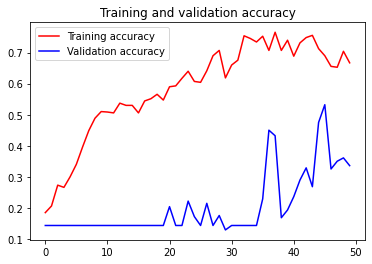

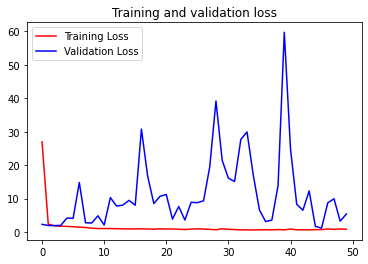

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()